In [132]:
import numpy as np
import scipy.special as spc
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('white')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [197]:
def calc_probs(p, n):
    probs = 0
    for j in range(np.int(n/2), int(n)):
        i = j+1
        probs += spc.comb(n,i)*np.power(p,i)*np.power((1-p),n-i)
    return probs
    
# print(calc_probs(0.8,3))
# print(calc_probs(0.8,4))
print(calc_probs(0.8,5))

0.94208


In [79]:
def calc_exact_probs(p,n,k):
    return spc.comb(n,k)*np.power(p,k)*np.power((1-p),n-k)

In [246]:
def calc_at_least_k_probs(p,n,k):
    probs = 0
    if k > 0:
        for i in range(k, n+1):
            probs += spc.comb(n,i)*np.power(p,i)*np.power((1-p),n-i)
        return probs
    return 1

print(calc_at_least_k_probs(0.6,10,6))

0.6331032576


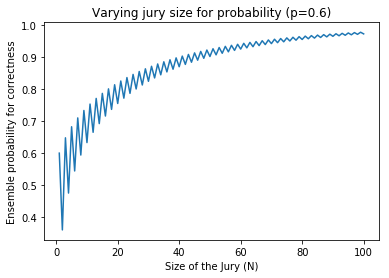

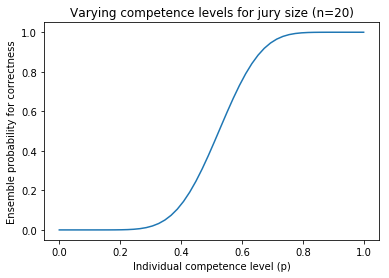

In [28]:
x = np.linspace(1,100,100)


xline = [calc_probs(0.6,i) for i in x]
plt.plot(x, xline)
plt.ylabel('Ensemble probability for correctness')
plt.xlabel('Size of the Jury (N)')
plt.title('Varying jury size for probability (p=0.6)')
plt.show()

x = np.linspace(0,1)

xline = [calc_probs(i,20) for i in x]
plt.plot(x,xline)
plt.xlabel('Individual competence level (p)')
plt.ylabel('Ensemble probability for correctness')
plt.title('Varying competence levels for jury size (n=20)')
plt.show()

# 3 a)

In [80]:
# jury size 11. 10 with p=0.6, 1 with p=0.8. Check 2 cases to make a majority

# case 1: at least 6 weak jury members are correct
case_1 = calc_probs(0.6,10)

# Case 2: exactly 5 weak jury members are correct and the strong jury member is correct
weak_5 = calc_exact_probs(0.6,10,5)
case_2 = weak_5 * 0.8

print(case_1+case_2)

0.79362975744


# 3 b)

In [254]:
"""""
Jury size 11. 10 with p=0.6, 1 with p=0.8. Check 2 cases to make a majority
Weight is the multiple votes that the strong classifier is worth.
Therefore to get a majority 
"""""

w = 0
n=10

p_weak = 0.6
p_strong = 0.8

# case 1: at least 6 weak jury members are correct
case_1 = calc_probs(p_weak,n)
# Case 2: exactly w strong jury members and n/2+1-w weak jury members are correct. w = [1,6]
weak = calc_at_least_k_probs(0.6,n,int(n/2)+1-w)
print(weak, int(n/2)+1-w)
case_2 = weak * p_strong

if w >= 6:
    print(p_strong)
else:
    print(case_1+case_2)

0.6331032576 6
1.1395858636799998


# 3 c)

In [268]:
x = np.array([0.6]*10 + [0.8])
y = x
#Toy Dataset
# x1 = np.array([.1,.2,.4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6,.25,.3,.5,.7,.6])
# x2 = np.array([.2,.65,.7,.6, .3,.1,.4,.66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])
# y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
# X = np.vstack((x1,x2)).T
X = x.reshape(-1,1)


def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))

    
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    elif hasattr(classifier, "predict_proba"):
        zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    else :
        zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #Get current axis and plot
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    
    
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=10, learning_rate=1.0)
boost.fit(X,y)
plot_decision_boundary(boost, X,y, N = 50)#, weights)
plt.show()

boost.score(X,y)

(11, 1)


ValueError: Unknown label type: 'continuous'